In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Query All Records in the the Database
data = engine.execute("SELECT * FROM station")

for record in data:
     print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
measurment = Base.classes.measurement

In [9]:
stations =Base.classes.station

In [10]:
# Save references to each table
session = Session(engine)
conn = engine.connect()

In [11]:
# Query All Records in the the Database
data_station = pd.read_sql("SELECT * FROM station", conn)

In [24]:
data_station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [25]:
# Query All Records in the the Database
data_measurment = pd.read_sql("SELECT * FROM measurement", conn)

In [26]:
data_measurment

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [27]:
# Query All Records in the the Database


In [28]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [29]:
# Path to sqlite
database_path = "../Resources/Census_Data.sqlite"

In [30]:
data = session.query(measurment.date,measurment.prcp,measurment.tobs)
data

In [31]:
# for record in data:
#     print(record)

In [32]:
# data_measurment["prcp"].describe()

In [33]:
# Find the most recent date in the data set.
session.query(measurment.date).order_by(measurment.date.desc()).first()

('2017-08-23')

In [34]:
last_year = session.query(measurment.date,measurment.prcp).\
    filter(measurment.date >= '2016-08-23').\
    order_by(measurment.date).all()

last_year 

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [38]:
# df = pd.DataFrame(last_year, columns=['date', 'prcp'])
# df

In [39]:
df_index = df.set_index("date")
# df_index

In [109]:
df_index.sort_values(by='date')

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [110]:
df["prcp"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [219]:
# test = session.query(measurment.date,measurment.prcp).\
#     filter(measurment.date >= '2016-08-23').\
#     group_by(measurment.date).\
#     order_by(measurment.date).all()

In [220]:
# test2 = pd.DataFrame(test, columns=['date', 'prcp']).sort_values("date", ascending=False)
# test2

In [221]:
# test2.index = pd.to_datetime(test2['date'])

Text(0, 0.5, 'Inches')

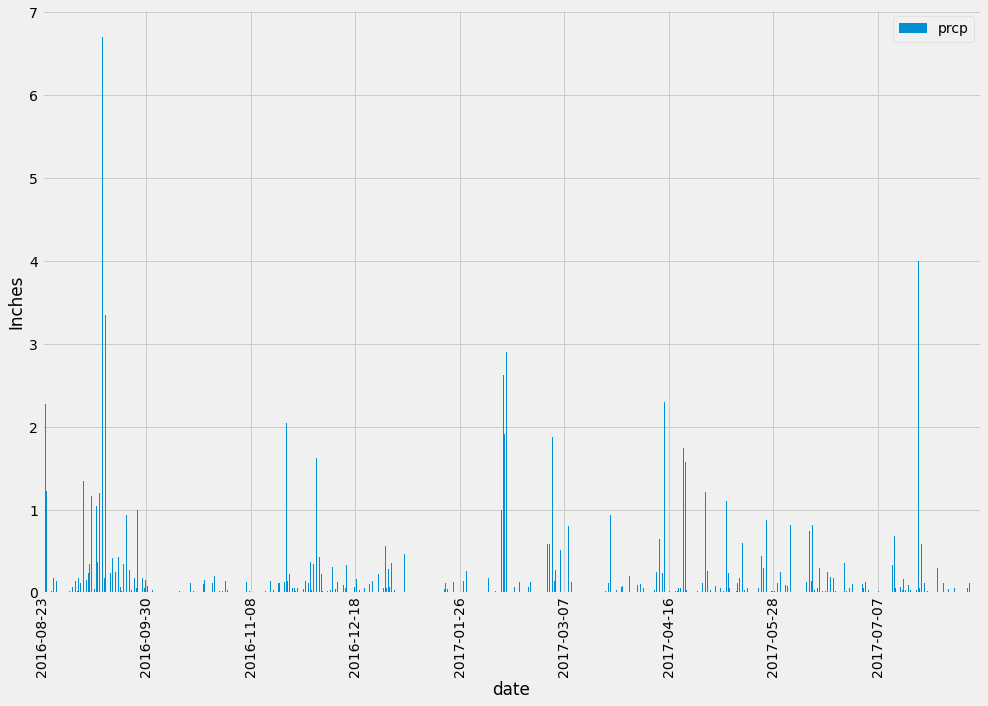

In [368]:
df_index.plot(kind="bar",figsize=(15,10)).locator_params(axis="x", nbins=9)
plt.ylabel('Inches')

In [137]:
# most_recent_date = engine.execute('SELECT * FROM measurement order by date desc').fetchall()
# most_recent_date

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [166]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_test = pd.DataFrame(df["prcp"].describe())
df_test

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [191]:
total_list = list(session.query(measurment.station))

In [227]:
data_measurment["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [262]:
session.query(func.count(stations.station)).all()

[(9)]

In [270]:
session.query(measurment.station, func.count(measurment.station)).group_by(measurment.station).order_by(func.count(measurment.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [282]:
# session.query([measurment.station == 'USC00519281', func.avg(measurment.tobs)])

In [287]:
temperatures = session.query(func.avg(measurment.tobs), func.min(measurment.tobs), func.max(measurment.tobs)).filter(measurment.station == "USC00519281").all()
print(temperatures)

[(71.66378066378067, 54.0, 85.0)]


In [ ]:
# Design a query to calculate the total number stations in the dataset


In [323]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [302]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [333]:
session.query(measurment.date).\
filter(measurment.station).\
group_by(measurment.station == "USC00519281").\
order_by(measurment.station).first()

In [363]:
one_year = session.query(measurment.date, measurment.station,measurment.tobs).\
    filter(measurment.date >= '2016-08-18').\
    filter(measurment.station == "USC00519281").\
    order_by(measurment.date).all()
one_year

[('2016-08-18', 'USC00519281', 80.0),
 ('2016-08-19', 'USC00519281', 79.0),
 ('2016-08-20', 'USC00519281', 81.0),
 ('2016-08-21', 'USC00519281', 79.0),
 ('2016-08-22', 'USC00519281', 78.0),
 ('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-1

In [364]:
df_station = pd.DataFrame(one_year, columns=['date', 'station','tobs'])
df_station

,date,station,tobs
0,2016-08-18,USC00519281,80.0
1,2016-08-19,USC00519281,79.0
2,2016-08-20,USC00519281,81.0
3,2016-08-21,USC00519281,79.0
4,2016-08-22,USC00519281,78.0
...,...,...,...
352,2017-08-14,USC00519281,77.0
353,2017-08-15,USC00519281,77.0
354,2017-08-16,USC00519281,76.0
355,2017-08-17,USC00519281,76.0


Text(0.5, 0, 'Temperature')

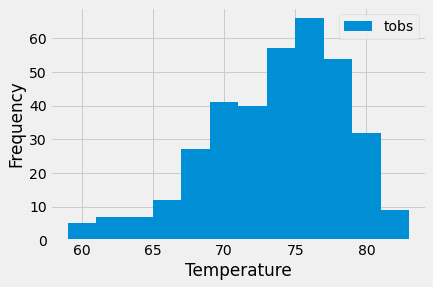

In [366]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_station.plot.hist(bins = 12)
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()